In [1]:
%matplotlib qt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import mne

C:\Users\Usuario\Anaconda3\lib\site-packages\numba\decorators.py:146: RuntimeWarning: Caching is not available when the 'parallel' target is in use. Caching is now being disabled to allow execution to continue.
  warnings.warn(msg, RuntimeWarning)


In [3]:
mne.set_log_level('warning')

In [4]:
import os

# Change the following path to where the folder ds000117-practical is on your disk
data_path = os.path.expanduser("D:/Research/Acad/PhD/Flicker/Data/")

raw_fname = os.path.join(data_path, 'e_oct/181018/oct_1_tsss.fif')

In [5]:
print(raw_fname)

D:/Research/Acad/PhD/Flicker/Data/e_oct/181018/oct_1_tsss.fif


In [6]:
raw = mne.io.read_raw_fif(raw_fname, preload=False)
print(raw)

<Raw  |  oct_1_tsss.fif, n_channels x n_times : 320 x 622000 (622.0 sec), ~5.6 MB, data not loaded>


<ipython-input-6-c815df92f23e>:1: RuntimeWarning: This filename (D:/Research/Acad/PhD/Flicker/Data/e_oct/181018/oct_1_tsss.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = mne.io.read_raw_fif(raw_fname, preload=False)


In [67]:
print(raw.info)

<Info | 27 non-empty fields
    acq_pars : str | 20504 items
    bads : list | MEG0223
    ch_names : list | MEG0113, MEG0112, MEG0111, MEG0122, MEG0123, MEG0121, ...
    chs : list | 308 items (GRAD: 204, MAG: 102, EOG: 1, ECG: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : str | 17 items
    dev_head_t : Transform | 3 items
    dig : Digitization | 315 items (3 Cardinal, 4 HPI, 308 Extra)
    events : list | 0 items
    experimenter : str | 33 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149011612 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    hpi_subsystem : dict | 2 items
    line_freq : float | 50.0
    lowpass : float | 40.0 Hz
    meas_date : tuple | 2018-10-18 07:51:55 GMT
    meas_id : dict | 4 items
    nchan : int | 308
    proc_history : list | 1 items
    proj_id : ndarray | 1 items
    proj_name : str | 9 items
    projs : list | 0 items
    sfreq : float | 1000.0 Hz
    subject_info : di

In [ ]:
raw.info['subject_info']

In [7]:
raw.info['sfreq']

1000.0

In [9]:
raw.info['bads'] 

[]

In [8]:
raw.info['line_freq']

50.0

In [10]:
channel_type = mne.io.pick.channel_type(raw.info, 75)
print('Channel #75 is of type:', channel_type)

channel_type = mne.io.pick.channel_type(raw.info, 319)
print('Channel #319 is of type:', channel_type)

Channel #75 is of type: grad
Channel #319 is of type: chpi


In [11]:
raw.info['chs'][0]

{'scanno': 1,
 'logno': 113,
 'kind': 1,
 'range': 1.9073486328125e-05,
 'cal': 3.250000046861601e-09,
 'coil_type': 3012,
 'loc': array([-0.1066    ,  0.0464    , -0.0604    , -0.015479  ,  0.006236  ,
        -0.999861  , -0.191935  , -0.98140198, -0.003222  , -0.98128599,
         0.19185799,  0.016388  ]),
 'unit': 201,
 'unit_mul': 0,
 'ch_name': 'MEG0113',
 'coord_frame': 1 (FIFFV_COORD_DEVICE)}

In [12]:
raw.plot_sensors(kind='topomap', ch_type='grad');

In [13]:
raw.ch_names

['MEG0113',
 'MEG0112',
 'MEG0111',
 'MEG0122',
 'MEG0123',
 'MEG0121',
 'MEG0132',
 'MEG0133',
 'MEG0131',
 'MEG0143',
 'MEG0142',
 'MEG0141',
 'MEG0213',
 'MEG0212',
 'MEG0211',
 'MEG0222',
 'MEG0223',
 'MEG0221',
 'MEG0232',
 'MEG0233',
 'MEG0231',
 'MEG0243',
 'MEG0242',
 'MEG0241',
 'MEG0313',
 'MEG0312',
 'MEG0311',
 'MEG0322',
 'MEG0323',
 'MEG0321',
 'MEG0333',
 'MEG0332',
 'MEG0331',
 'MEG0343',
 'MEG0342',
 'MEG0341',
 'MEG0413',
 'MEG0412',
 'MEG0411',
 'MEG0422',
 'MEG0423',
 'MEG0421',
 'MEG0432',
 'MEG0433',
 'MEG0431',
 'MEG0443',
 'MEG0442',
 'MEG0441',
 'MEG0513',
 'MEG0512',
 'MEG0511',
 'MEG0523',
 'MEG0522',
 'MEG0521',
 'MEG0532',
 'MEG0533',
 'MEG0531',
 'MEG0542',
 'MEG0543',
 'MEG0541',
 'MEG0613',
 'MEG0612',
 'MEG0611',
 'MEG0622',
 'MEG0623',
 'MEG0621',
 'MEG0633',
 'MEG0632',
 'MEG0631',
 'MEG0642',
 'MEG0643',
 'MEG0641',
 'MEG0713',
 'MEG0712',
 'MEG0711',
 'MEG0723',
 'MEG0722',
 'MEG0721',
 'MEG0733',
 'MEG0732',
 'MEG0731',
 'MEG0743',
 'MEG0742',
 'ME

In [24]:
start, stop = 178891, 298891
data, times = raw[:, start:stop]  # fetch all channels and the first 10 time points
print(data.shape)
print(times.shape)

(320, 120000)
(120000,)


In [40]:
times[0]

178.891

In [27]:
raw.load_data()  # it is required to load data in memory

<Raw  |  oct_1_tsss.fif, n_channels x n_times : 320 x 622000 (622.0 sec), ~1.49 GB, data loaded>

In [ ]:
# raw.resample(300)

In [28]:
to_drop = ['STI101', 'STI201', 'STI301', 'CHPI001', 'CHPI002', 'CHPI003',
           'CHPI004', 'CHPI005', 'CHPI006', 'CHPI007', 'CHPI008', 'CHPI009']

In [29]:
raw.drop_channels(to_drop)

<Raw  |  oct_1_tsss.fif, n_channels x n_times : 308 x 622000 (622.0 sec), ~1.43 GB, data loaded>

In [32]:
raw.info

<Info | 27 non-empty fields
    acq_pars : str | 20504 items
    bads : list | 0 items
    ch_names : list | MEG0113, MEG0112, MEG0111, MEG0122, MEG0123, MEG0121, ...
    chs : list | 308 items (GRAD: 204, MAG: 102, EOG: 1, ECG: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : str | 17 items
    dev_head_t : Transform | 3 items
    dig : Digitization | 315 items (3 Cardinal, 4 HPI, 308 Extra)
    events : list | 0 items
    experimenter : str | 33 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149011612 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    hpi_subsystem : dict | 2 items
    line_freq : float | 50.0
    lowpass : float | 330.0 Hz
    meas_date : tuple | 2018-10-18 07:51:55 GMT
    meas_id : dict | 4 items
    nchan : int | 308
    proc_history : list | 1 items
    proj_id : ndarray | 1 items
    proj_name : str | 9 items
    projs : list | 0 items
    sfreq : float | 1000.0 Hz
    subject_info : d

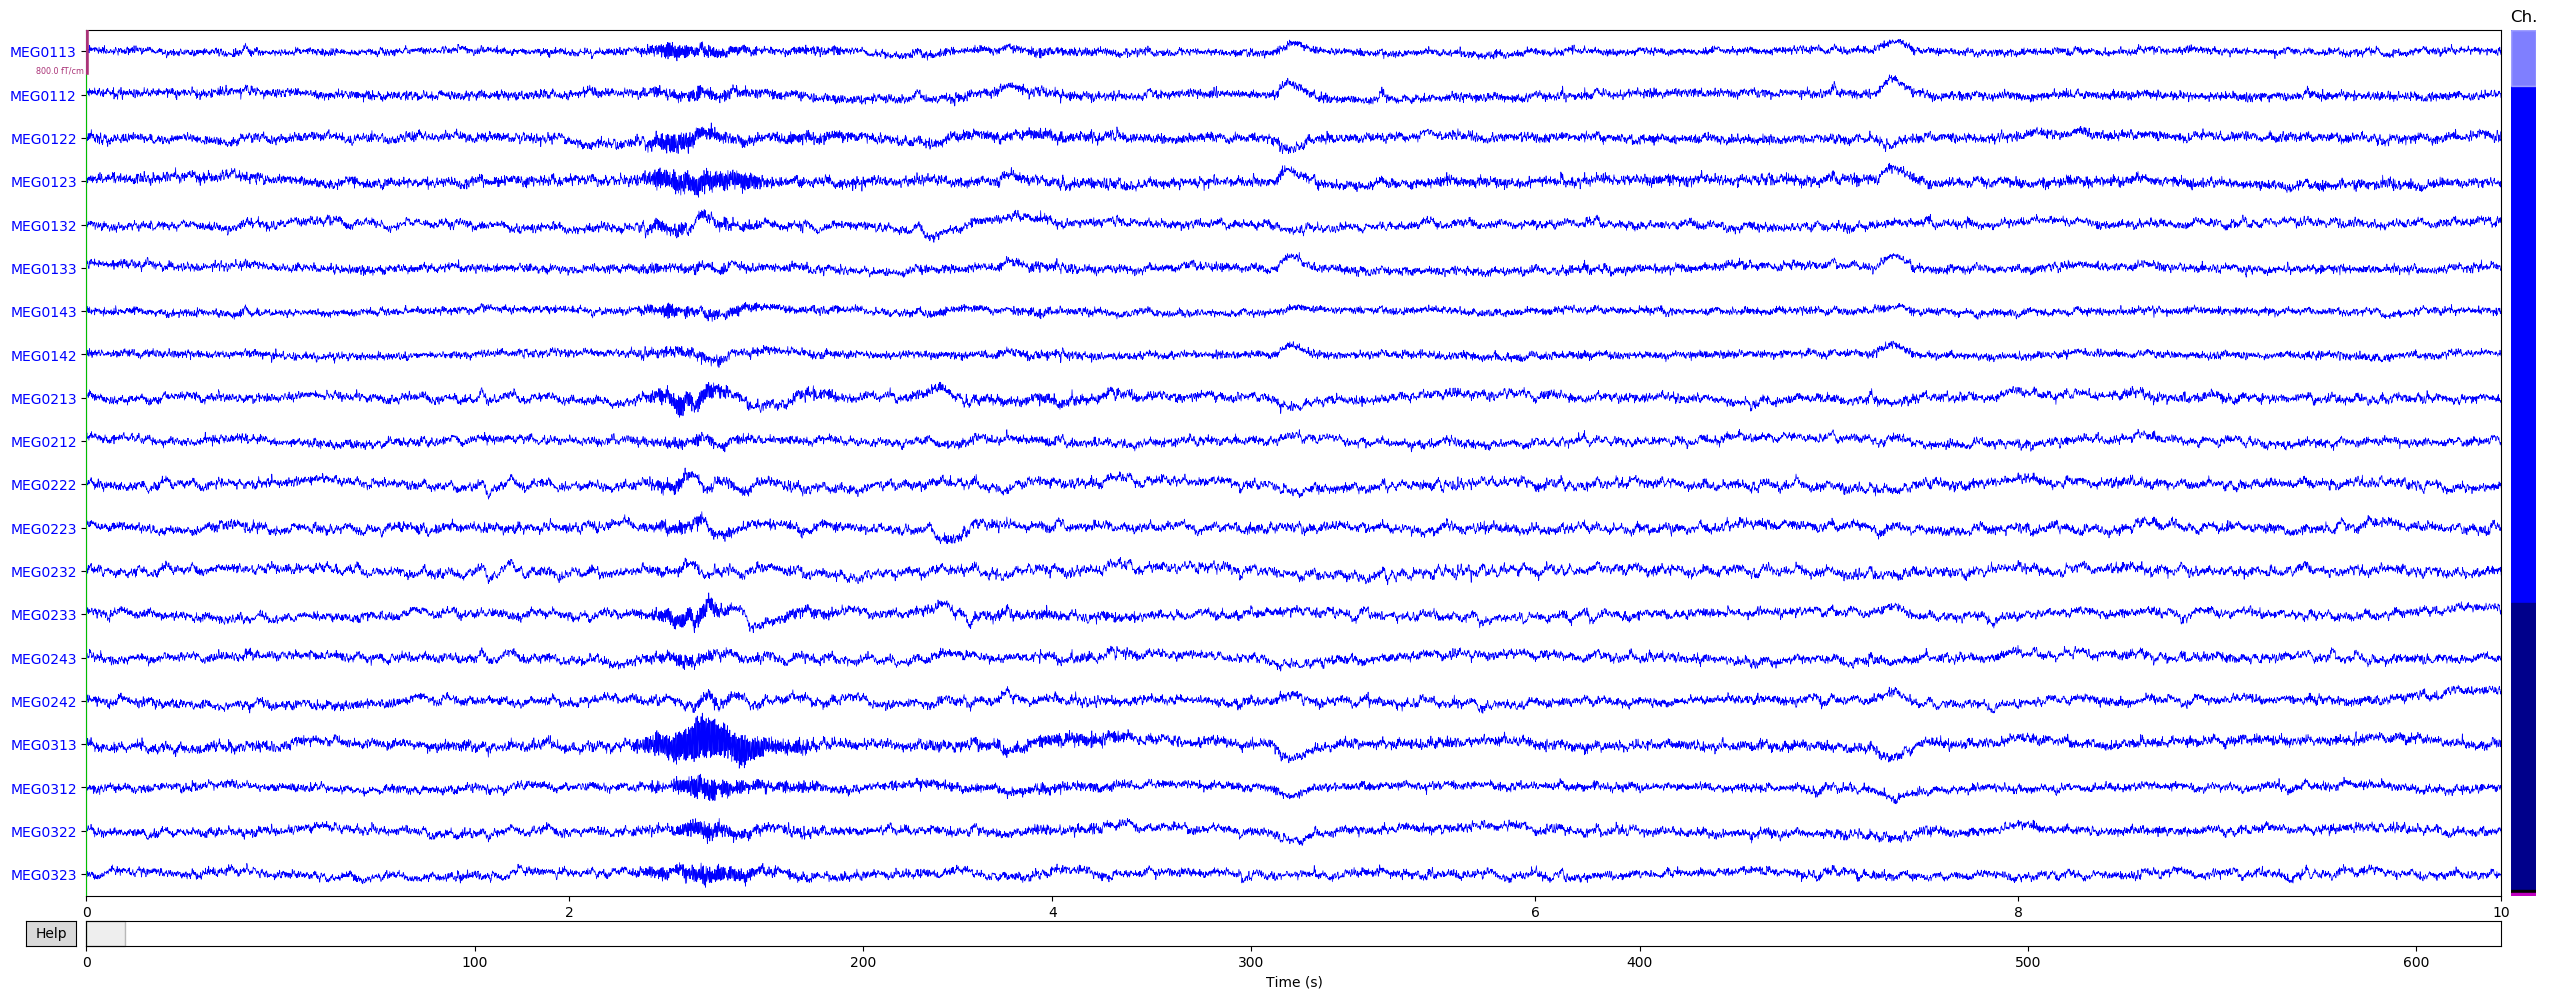

In [34]:
raw.plot()

In [35]:
raw.annotations

<Annotations  |  16 segments : BAD_MAG (16), orig_time : 2018-10-18 07:51:55.871437>

In [36]:
raw.annotations.save('annot.csv')

In [37]:
# !cat annot.csv

In [38]:
raw.filter(0, 40)

<Raw  |  oct_1_tsss.fif, n_channels x n_times : 308 x 622000 (622.0 sec), ~1.43 GB, data loaded>

In [68]:
d = raw.get_data(picks=('grad',))

In [69]:
d.shape

(204, 622000)

In [ ]:
# start = 0
# stop = int(50 * raw.info['sfreq'])
# data = raw.get_data('STI101', start=start, stop=stop)
# data.shape

In [ ]:
# plt.plot(raw.times[start:stop], data.T)

In [41]:
event_F_id = 1
events = np.array([[178892, 0, event_F_id]])

In [ ]:
# STIMULATION DELAY (#TODO)

In [43]:
fig = mne.viz.plot_events(events, raw.info['sfreq'])

In [44]:
event_id = {
    'flickering/sine': 1
}

In [45]:
fig = mne.viz.plot_events(events, raw.info['sfreq'],
                         event_id=event_id)

In [48]:
raw.plot?

In [49]:
events

array([[178892,      0,      1]])

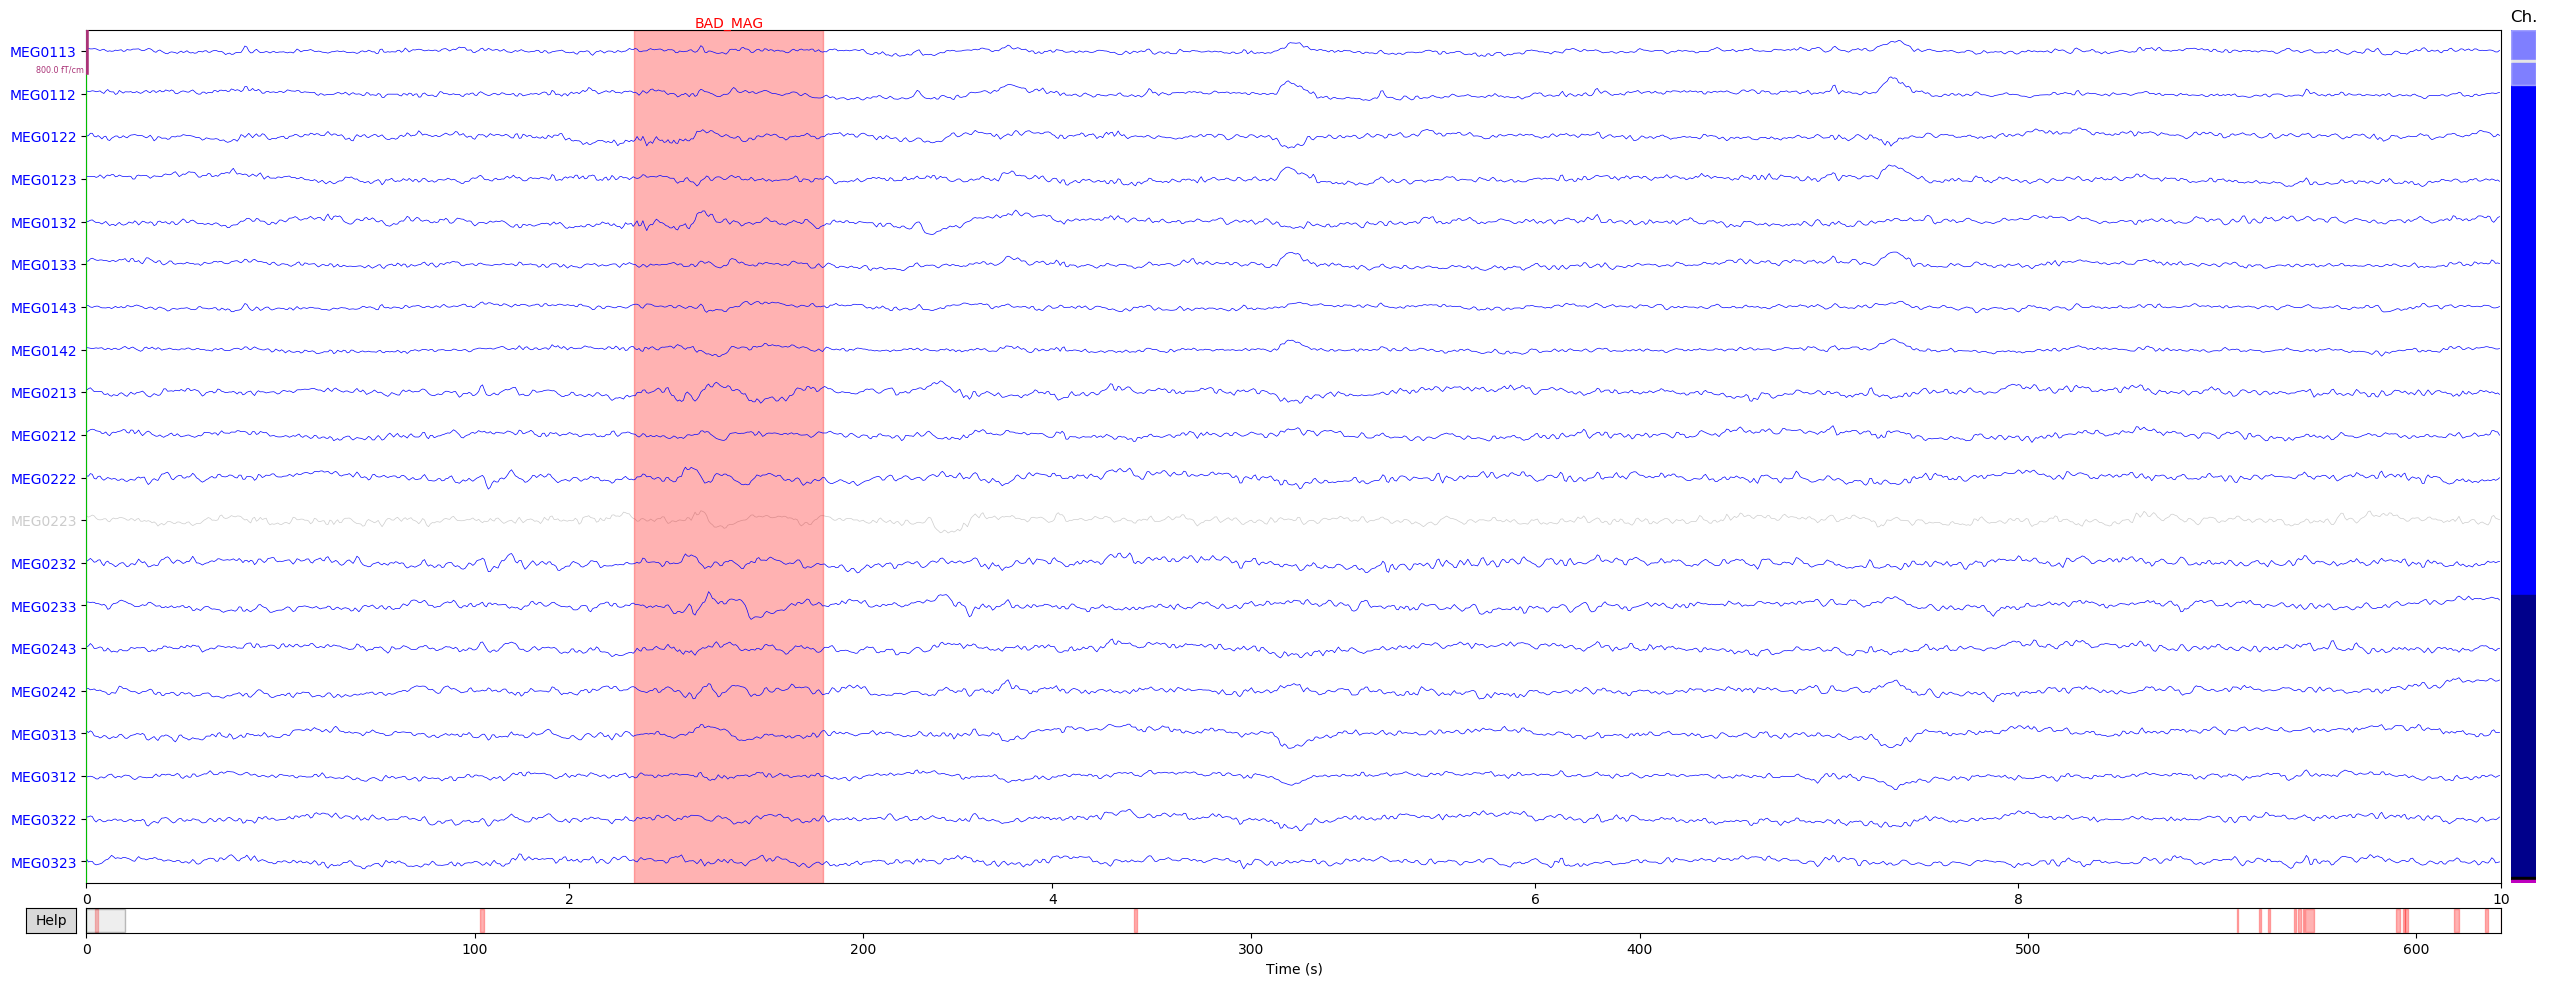

In [54]:
raw.plot(event_id=event_id, events=events)

In [100]:
tmin = -1.
tmax = 120.

In [101]:
baseline = (-1., 0.) # Only for the 1st (and only) sine flickering

In [95]:
picks = mne.pick_types(raw.info, meg=True, eeg=False, eog=True,
                      stim=False, exclude='bads')

In [96]:
picks

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [97]:
mne.Epochs?

In [102]:
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                   picks=picks, baseline=baseline)

In [103]:
print(epochs)

<Epochs  |   1 events (good & bad), -1 - 120 sec, baseline [-1, 0], ~5.6 MB, data not loaded,
 'flickering/sine': 1>


In [104]:
epochs.drop_bad()

<Epochs  |   1 events (all good), -1 - 120 sec, baseline [-1, 0], ~5.6 MB, data not loaded,
 'flickering/sine': 1>

In [105]:
epochs.load_data()

<Epochs  |   1 events (all good), -1 - 120 sec, baseline [-1, 0], ~289.0 MB, data loaded,
 'flickering/sine': 1>

In [112]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw.copy().filter(1, None))

In [113]:
eog_epochs.average().plot_joint()

[<Figure size 800x420 with 7 Axes>, <Figure size 800x420 with 7 Axes>]

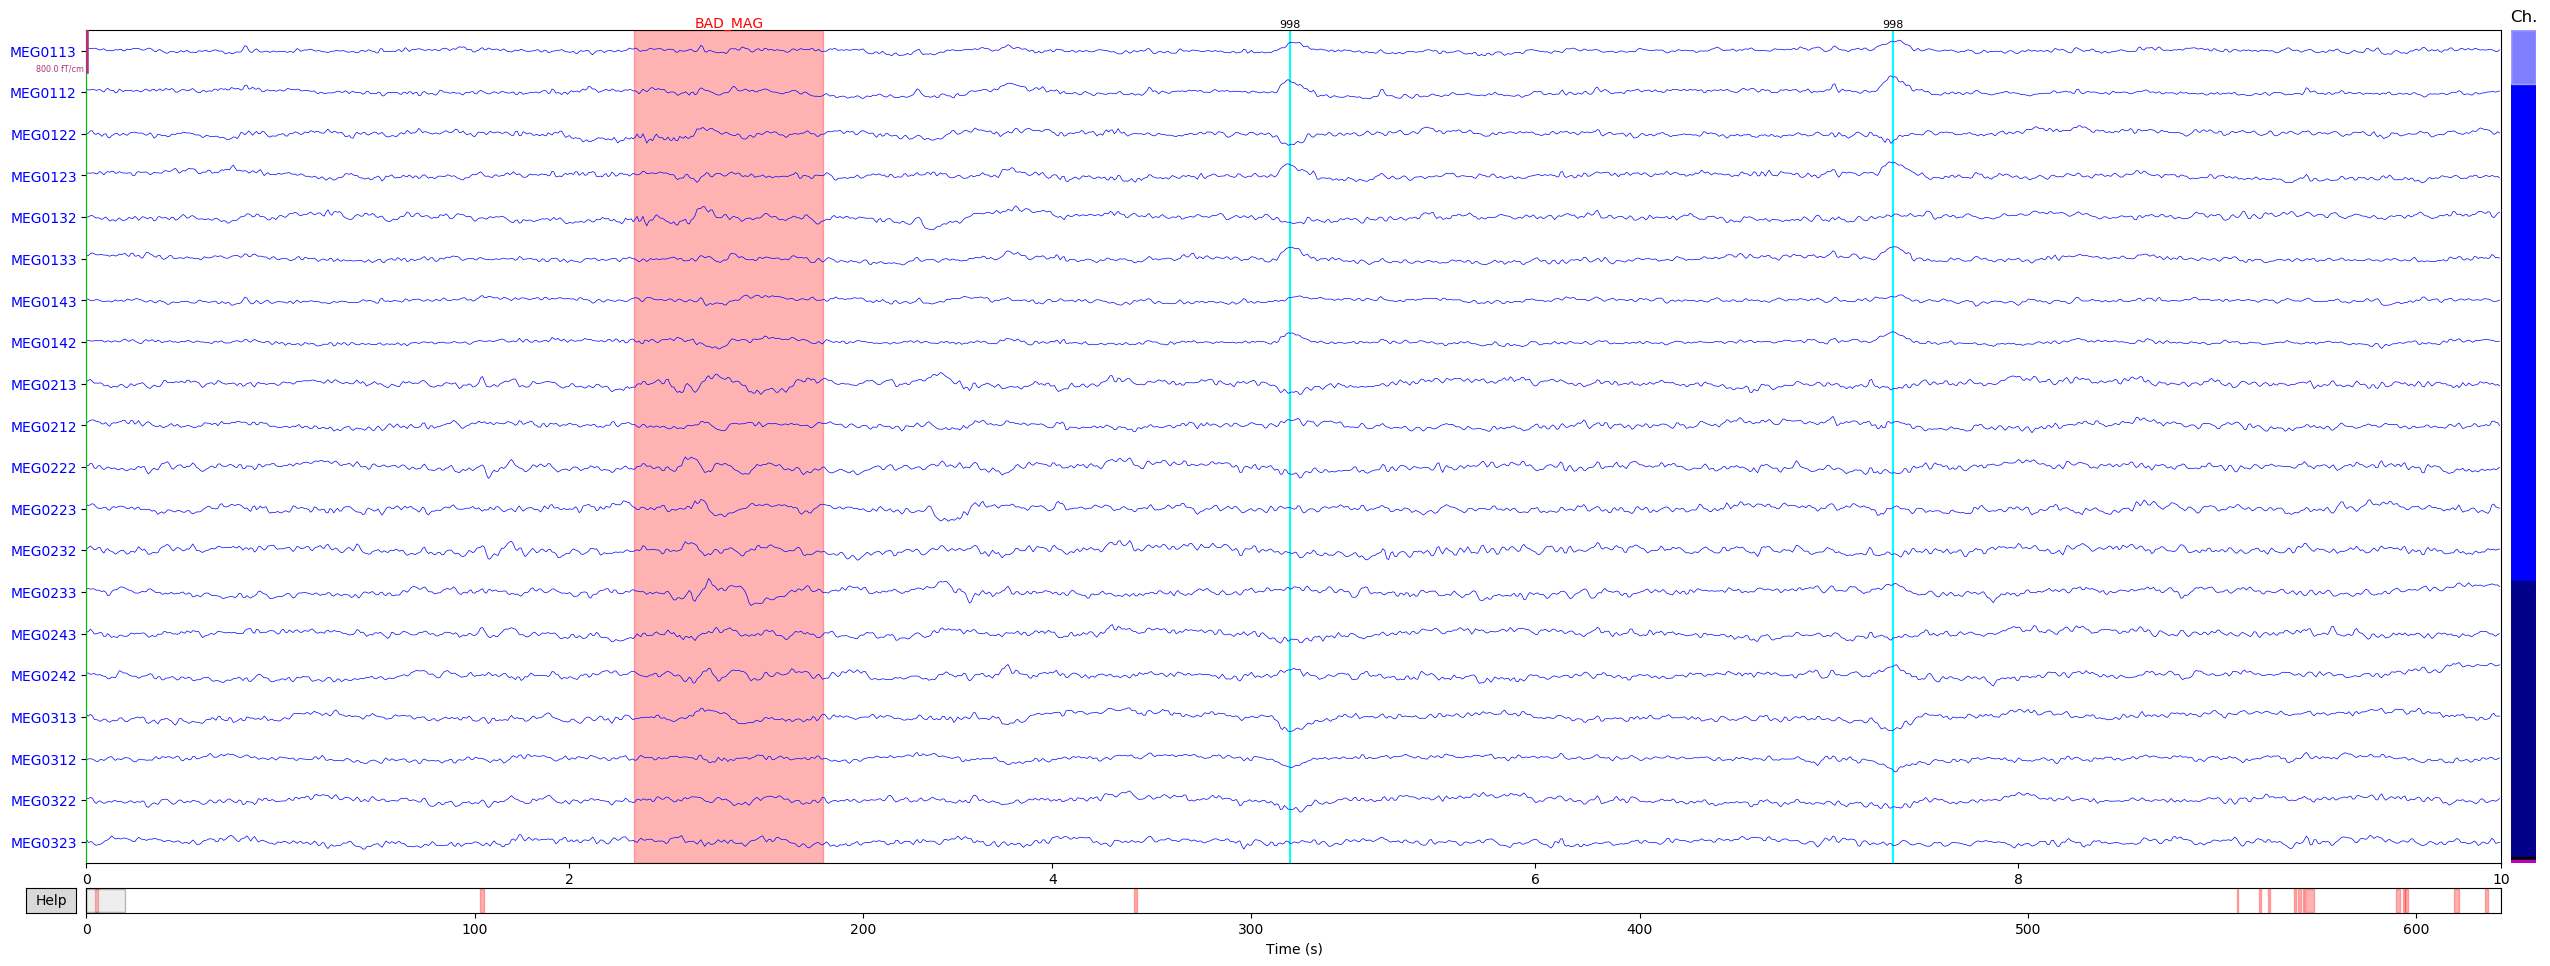

In [114]:
raw.plot(events=eog_epochs.events)

In [115]:
projs_eog, _ = mne.preprocessing.compute_proj_eog(
raw, n_mag=3, n_grad=3, average=True)

In [116]:
projs_eog

[<Projection  |  EOG-planar--0.200-0.200-PCA-01, active : False, n_channels : 204>,
 <Projection  |  EOG-planar--0.200-0.200-PCA-02, active : False, n_channels : 204>,
 <Projection  |  EOG-planar--0.200-0.200-PCA-03, active : False, n_channels : 204>,
 <Projection  |  EOG-axial--0.200-0.200-PCA-01, active : False, n_channels : 102>,
 <Projection  |  EOG-axial--0.200-0.200-PCA-02, active : False, n_channels : 102>,
 <Projection  |  EOG-axial--0.200-0.200-PCA-03, active : False, n_channels : 102>]

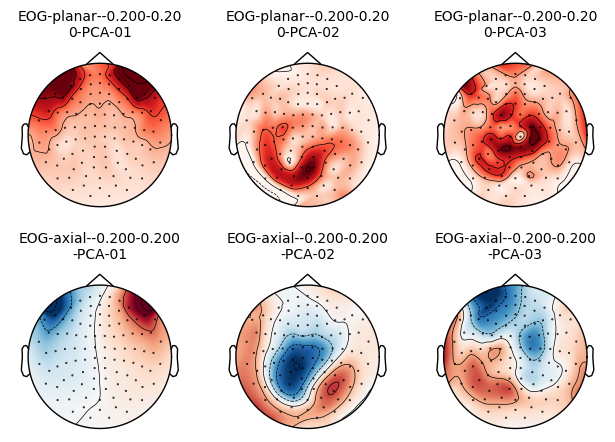

In [117]:
layouts = [mne.find_layout(raw.info, ch_type=ch) for ch in ("mag", "grad")]
mne.viz.plot_projs_topomap(projs_eog, layout=layouts)

In [118]:
ecg_epochs = mne.preprocessing.create_ecg_epochs(raw.copy().filter(1, None))

In [119]:
ecg_epochs.average().plot_joint()

[<Figure size 800x420 with 7 Axes>, <Figure size 800x420 with 7 Axes>]

In [120]:
projs_ecg, _ = mne.preprocessing.compute_proj_ecg(
raw, n_mag=3, n_grad=3, average=True)

<ipython-input-120-ae31628fdecf>:2: DeprecationWarning: reject_by_annotation in find_ecg_events defaults to False in 0.18 but will change to True in 0.19, set it explicitly to avoid this warning
  raw, n_mag=3, n_grad=3, average=True)


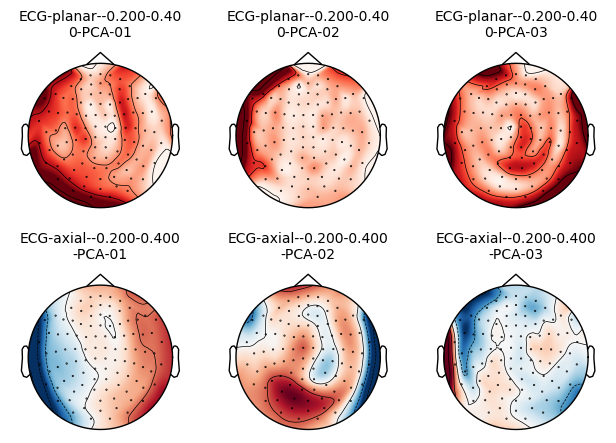

In [121]:
mne.viz.plot_projs_topomap(projs_ecg, layout=layouts)

In [131]:
epochs_clean = mne.Epochs(raw, events, event_id, tmin, tmax, proj=False,
                         picks=picks, baseline=baseline, preload=False)

In [132]:
epochs_clean

<Epochs  |   1 events (good & bad), -1 - 120 sec, baseline [-1, 0], ~5.6 MB, data not loaded,
 'flickering/sine': 1>

In [135]:
evoked = epochs_clean.copy().average()

In [126]:
evoked.plot?

In [129]:
epochs_clean.copy().average().plot(proj=False, spatial_colors=True);

In [137]:
# epochs_clean.copy().average().plot(proj='interactive', spatial_colors=True);

In [138]:
epochs = epochs_clean

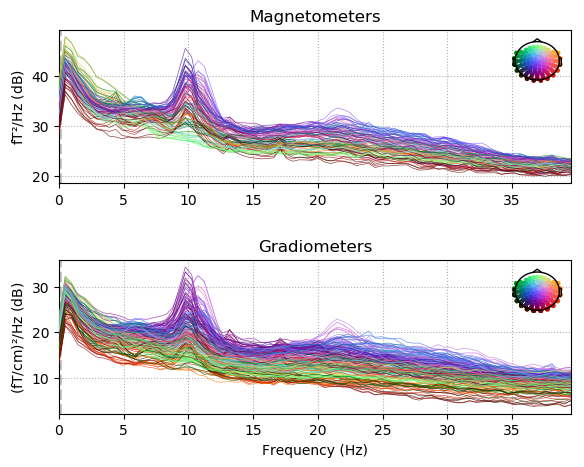

In [139]:
raw.plot_psd(fmax=40)

In [140]:
epochs.plot_image(picks='MEG1941', sigma=1.);

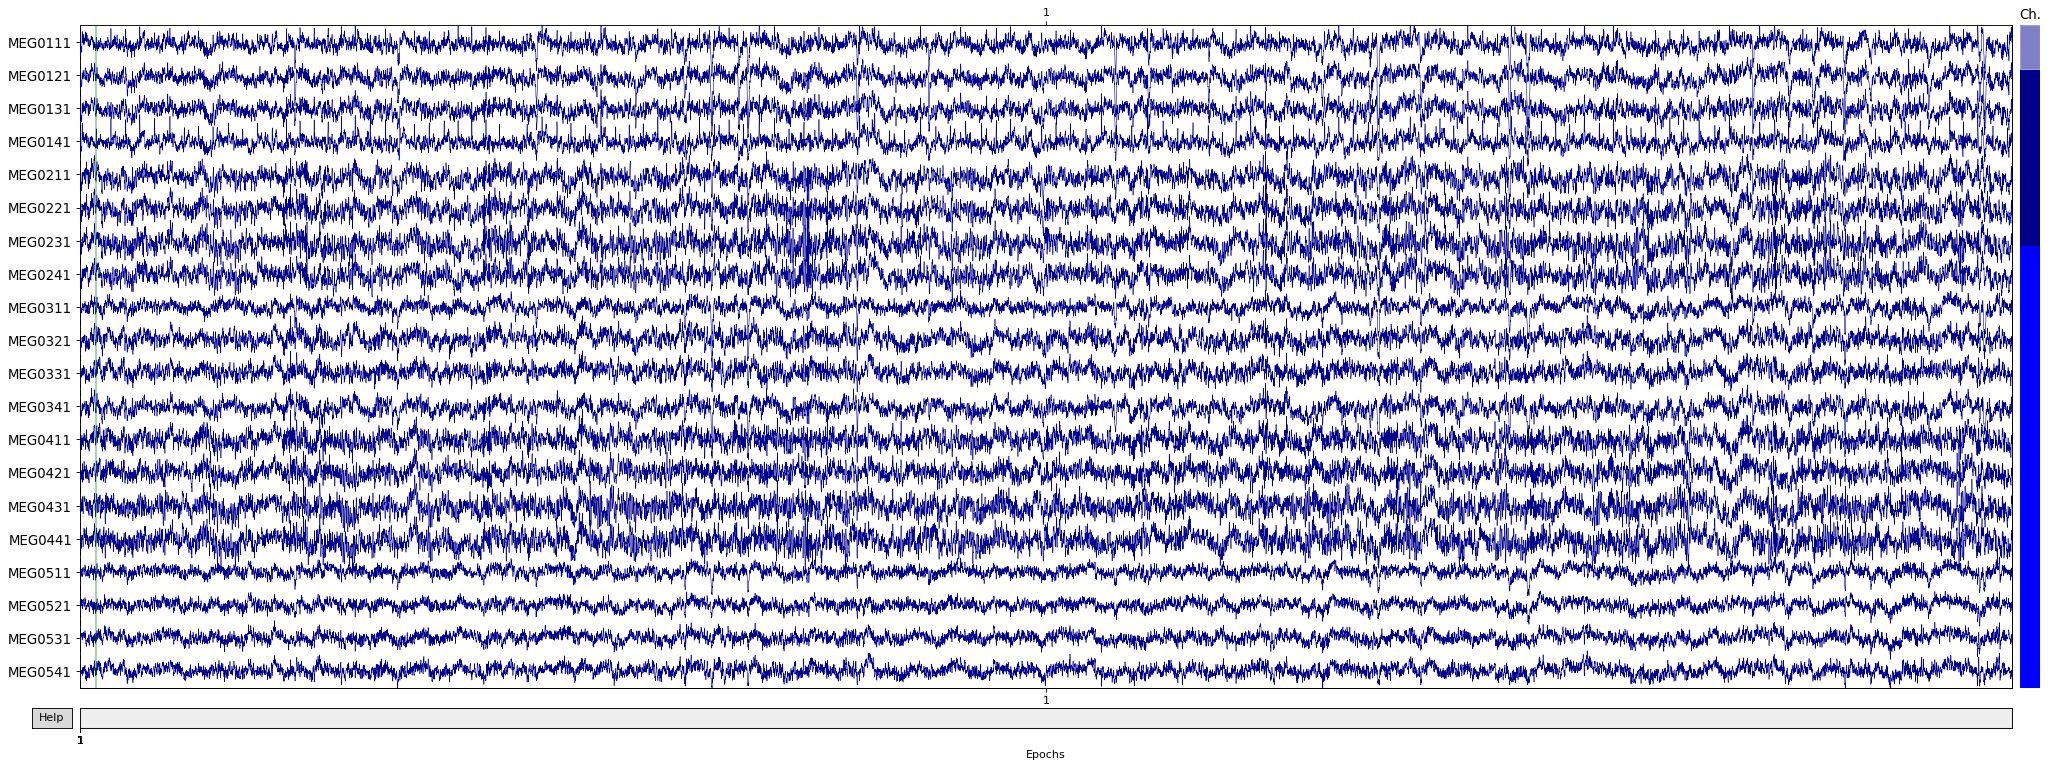

In [141]:
epochs.plot()

In [142]:
epochs_fname = raw_fname.replace('_tsss.fif', '-epo.fif')
epochs_fname

'D:/Research/Acad/PhD/Flicker/Data/e_oct/181018/oct_1-epo.fif'

In [143]:
epochs.save(epochs_fname, overwrite=True)

Loading data for 1 events and 121001 original time points ...
Loading data for 1 events and 121001 original time points ...


In [144]:
data = epochs.get_data()
data.shape

(1, 307, 121001)

In [147]:
evoked = epochs.average()
evoked.del_proj()
evoked.add_proj(projs_eog[::3] + projs_ecg[::3])
evoked.apply_proj()

<Evoked  |  'flickering/sine' (average, N=1), [-1, 120] sec, 306 ch, ~288.1 MB>

In [148]:
print(evoked)

<Evoked  |  'flickering/sine' (average, N=1), [-1, 120] sec, 306 ch, ~288.1 MB>


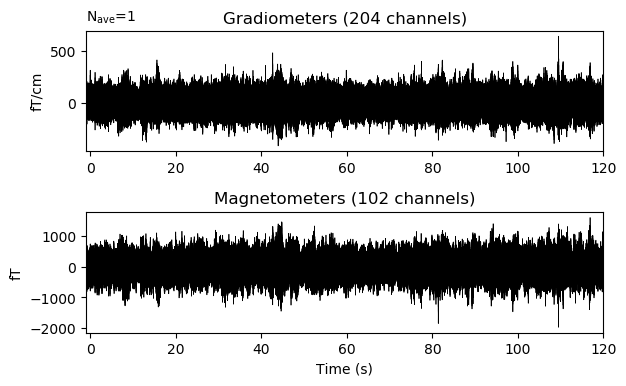

In [149]:
evoked.plot(proj=True)

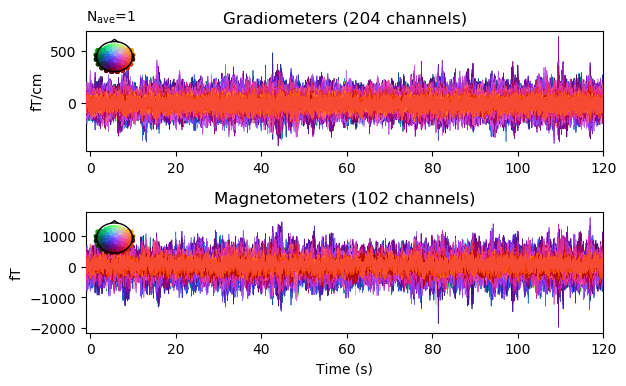

In [150]:
evoked.plot(spatial_colors=True, proj=True)

In [151]:
times = [0.0, 0.1, 0.18]
evoked.plot_topomap(ch_type='mag', times=times, proj=True);
evoked.plot_topomap(ch_type='grad', times=times, proj=True);